# Собственное непрерывное распределение

## Тема
Создание и анализ собственного распределения непрерывной случайной величины в Python


## Описание

Рассмотрим непрерывную случайную величину X с треугольной плотностью
на интервале [0, 2], симметричной относительно точки x = 1.

Плотность возрастает на [0, 1] и убывает на [1, 2].


## 1. Определение функции плотности

Плотность вероятности задана следующим образом:

$$
\varphi(x) =
\begin{cases}
x, & 0 \le x \le 1, \\
2 - x, & 1 < x \le 2, \\
0, & \text{иначе}.
\end{cases}
$$


### Проверка нормировки

$$
\int_0^1 x \, dx + \int_1^2 (2 - x)\, dx
= \frac{1}{2} + \frac{1}{2} = 1
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from scipy import integrate


In [2]:
class TriangularDist(rv_continuous):
    def __init__(self, **kwargs):
        super().__init__(a=0, b=2, name="triangular_custom", **kwargs)

    def _pdf(self, x):
        result = np.zeros_like(x)
        mask1 = (x >= 0) & (x <= 1)
        mask2 = (x > 1) & (x <= 2)
        result[mask1] = x[mask1]
        result[mask2] = 2 - x[mask2]
        return result

    def _cdf(self, x):
        result = np.zeros_like(x, dtype=float)

        result[x < 0] = 0

        mask1 = (x >= 0) & (x <= 1)
        result[mask1] = x[mask1]**2 / 2

        mask2 = (x > 1) & (x <= 2)
        result[mask2] = 1 - (2 - x[mask2])**2 / 2

        result[x > 2] = 1
        return result


In [3]:
tri_dist = TriangularDist()

integral, _ = integrate.quad(tri_dist.pdf, 0, 2)
print("Интеграл плотности =", integral)


Интеграл плотности = 1.0


In [4]:
print("F(0) =", tri_dist.cdf(0))
print("F(2) =", tri_dist.cdf(2))


F(0) = 0.0
F(2) = 1.0


### Числовые характеристики

Математическое ожидание:
$$
M[X] = 1
$$

Дисперсия:
$$
D[X] = \frac{1}{6}
$$

Среднее квадратическое отклонение:
$$
\sigma[X] \approx 0.408
$$


In [5]:
mean, var, skew, kurt = tri_dist.stats(moments="mvsk")

print(f"M[X] = {mean:.4f}")
print(f"D[X] = {var:.4f}")
print(f"σ[X] = {np.sqrt(var):.4f}")
print(f"Асимметрия = {skew:.4f}")
print(f"Эксцесс = {kurt:.4f}")


M[X] = 1.0000
D[X] = 0.1667
σ[X] = 0.4082
Асимметрия = -0.0000
Эксцесс = -0.6000


In [6]:
prob = tri_dist.cdf(1.5) - tri_dist.cdf(0.5)
print(f"P(0.5 ≤ X ≤ 1.5) = {prob:.4f}")


P(0.5 ≤ X ≤ 1.5) = 0.7500


In [9]:
q25 = tri_dist.ppf(0.25)
q50 = tri_dist.ppf(0.5)
q75 = tri_dist.ppf(0.75)

print(f"25%-квантиль = {q25:.4f}")
print(f"Медиана = {q50:.4f}")
print(f"25% точка = {q75:.4f}")


25%-квантиль = 0.7071
Медиана = 1.0000
25% точка = 1.2929


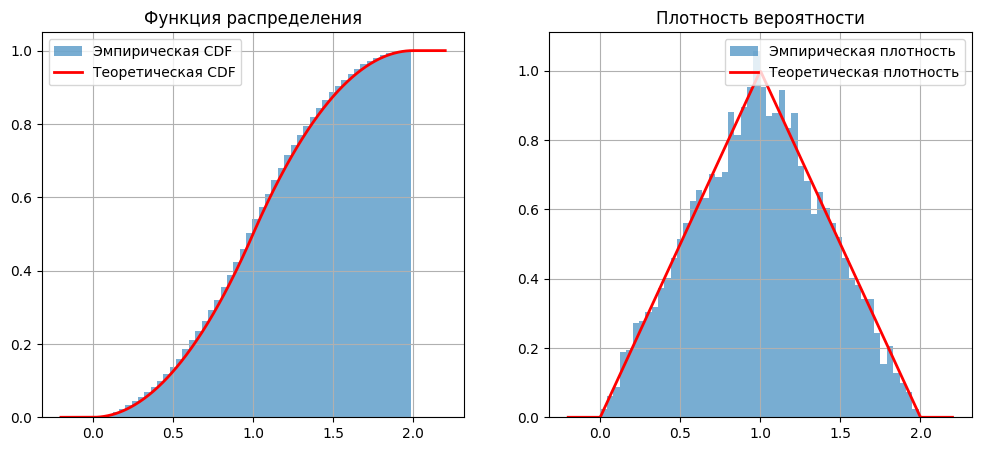

In [10]:
samples = tri_dist.rvs(size=10000)

x_plot = np.linspace(-0.2, 2.2, 500)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(samples, bins=50, density=True, cumulative=True, alpha=0.6, label="Эмпирическая CDF")
ax1.plot(x_plot, tri_dist.cdf(x_plot), 'r', lw=2, label="Теоретическая CDF")
ax1.set_title("Функция распределения")
ax1.grid(True)
ax1.legend()

ax2.hist(samples, bins=50, density=True, alpha=0.6, label="Эмпирическая плотность")
ax2.plot(x_plot, tri_dist.pdf(x_plot), 'r', lw=2, label="Теоретическая плотность")
ax2.set_title("Плотность вероятности")
ax2.grid(True)
ax2.legend()

plt.show()


## Вывод

Было построено собственное непрерывное распределение
с кусочно-линейной плотностью.

Проверено условие нормировки, получены аналитические
и численные характеристики случайной величины,
а также визуализированы плотность и функция распределения.
